# Analyzing production of honey

####  Importing libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score


### Data Understanding

In [20]:
df = pd.read_csv("honeyproduction.csv")
df.head(5)


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


#### Looking on nan values

In [21]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

### Having a view on our data

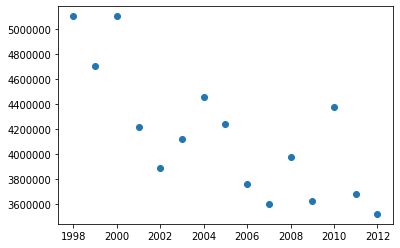

In [22]:
prod_per_year=df.groupby('year').totalprod.mean().reset_index()
x=prod_per_year[['year']]
x=x.values.reshape(-1,1)
y=prod_per_year[['totalprod']]
plt.scatter(x,y)
plt.show()

###  Modeling on Linear Regression

[[-88303.18915238]]
[1.81208083e+08]


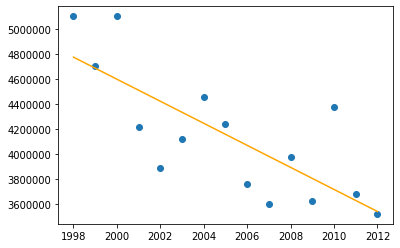

In [23]:
regr=linear_model.LinearRegression()
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)
y_predict=regr.predict(x)
plt.scatter(x,y)

plt.plot(x,y_predict,color='orange')
plt.show()



### We have created a model and now we are predicting the honey production from 2013 to 2050

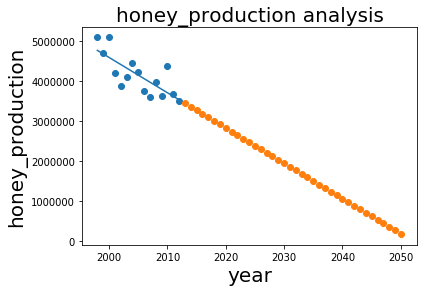

In [24]:
X_future=np.array(range(2013,2051))
X_future=X_future.reshape(-1,1)

future_predict =regr.predict(X_future)
plt.xlabel('year',fontsize=20)
plt.ylabel('honey_production',fontsize=20)
plt.title('honey_production analysis',fontsize=20)
plt.scatter(x,y)
plt.scatter(X_future,future_predict)
plt.plot(x,y_predict)
plt.show()
